### Criação de Modelo de Regressão Linear Univariada
##### Estudos iniciais
João Enrique Cairuga

### Criação do Modelo
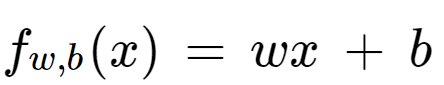

In [1]:
def hipotese (w,b,x):
    '''Função que calcula valores estimados para y'''
    m = x.shape
    f_wb = np.zeros(m)
    for i in range(len(x)):
        f_wb[i] = w*x[i] + b
    return f_wb   

### Definindo Função Perda
Erro Quadrado Médio

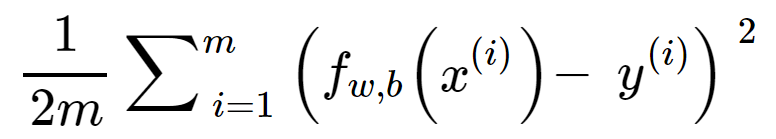

In [2]:
def Jwb(w,b,x,y):
    '''Cálculo da função perda: Erro Médio Quadrado'''
    soma = 0
    for i in range(len(y)):
        soma+= (x[i]*w+b - y[i])**2
    j = soma/2 *len(y)
    return j    

### Definindo Gradiente Descendente de cada parâmetro

w:

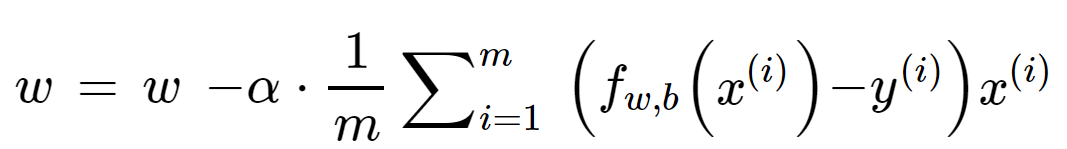

b:

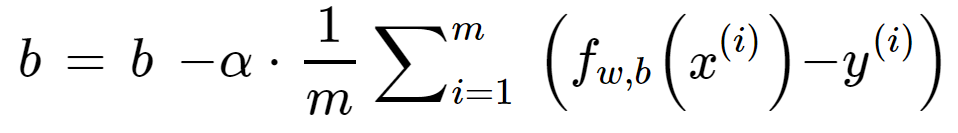

In [3]:
def gd_w(w,b,alfa,x,y):
    '''Gradiente Descendente de w'''
    soma =0
    for i in range(len(y)):
        soma+= (x[i]*w+b  - y[i])*x[i]
    jw = soma/len(y)
    return w - alfa * jw

In [4]:
def gd_b(w,b,alfa,x,y):
    '''Gradiente Descendente de b'''
    soma = 0
    for i in range(len(y)):
        soma+= (x[i]*w+b  - y[i])
    jb = soma/len(y)
    return b - alfa *jb

In [5]:
def treino (x,target,alfa):
    '''Calculando w e b próximos do mínimo'''
    w = 0
    b = 0
    while True:
        # Atualizando simultaneamente w e b
        tmp_w = gd_w(w, b, alfa, x, target)
        tmp_b = gd_b(w, b, alfa, x, target)

        # Testando se está no mínimo
        tolerancia = 1e-6
        if abs(tmp_w - w) < tolerancia and abs(tmp_b - b) < tolerancia:
            break

        w = tmp_w
        b = tmp_b
    return w,b

### Testando o Modelo

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Leitura e Visualização dos dados

In [7]:
dataset = pd.read_csv('testeRLU.csv') #https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch/notebook

In [8]:
dataset.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


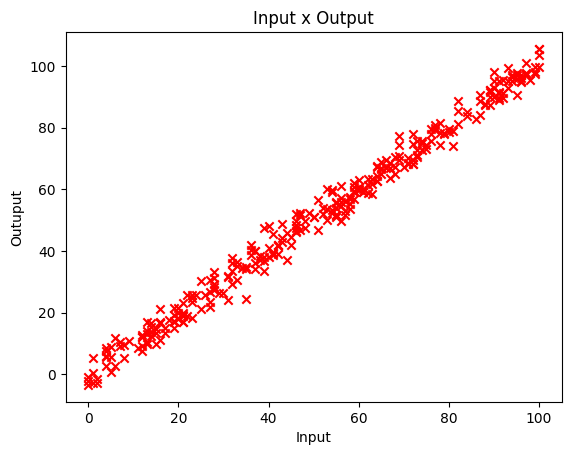

In [9]:
#gráfico de dispersão
plt.scatter(dataset['x'],dataset['y'], marker= 'x', c='r' )
plt.title("Input x Output")
plt.ylabel("Outuput")
plt.xlabel("Input")
plt.show()

#### Testando algoritmo

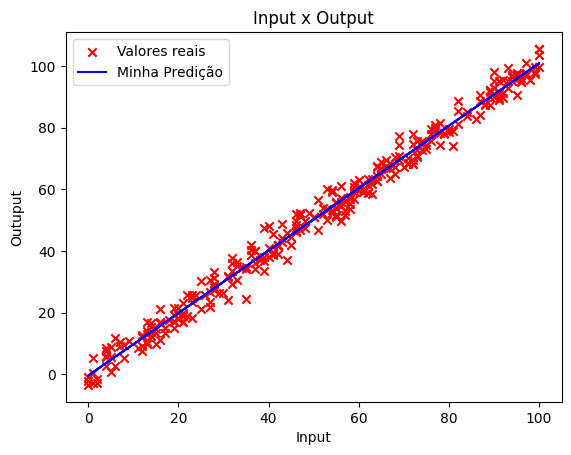

In [8]:
# Separando inputs de outputs
x = dataset['x'].astype(float)
target = dataset['y'].astype(float)
w,b =  treino(x,target,0.0001)
estimativas = hipotese(w,b,dataset['x'])
plt.scatter(x,target, marker= 'x', c='r', label = "Valores reais" )
plt.plot(x,estimativas,c ='b', label= "Minha Predição")
plt.title("Input x Output")
plt.ylabel("Outuput")
plt.xlabel("Input")
plt.legend()
plt.show()

In [9]:
valor_x = float(input("Insira uma entrada: "))
print(f"O output para a entrada {valor_x} é: {w*valor_x+b}")

O output para a entrada 77.0 é: 77.6356126491024


### Teste com dataset criado pelo ChatGPT


In [3]:
dataGPT = pd.read_csv('testeRLUgpt.csv')

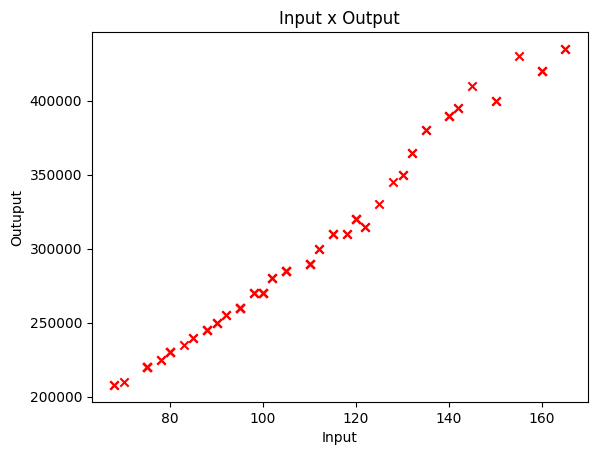

In [11]:
#gráfico de dispersão
plt.scatter(dataGPT['size_sq_m'],dataGPT['price_usd'], marker= 'x', c='r' )
plt.title("Input x Output")
plt.ylabel("Outuput")
plt.xlabel("Input")
plt.show()

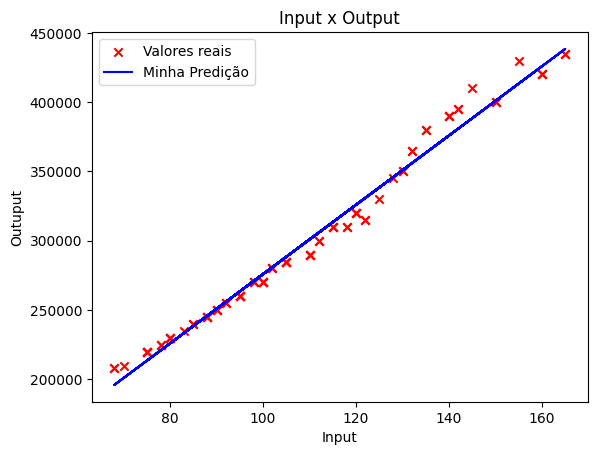

In [17]:
# Separando inputs de outputs
x = dataGPT['size_sq_m'].astype(float)
target = dataGPT['price_usd'].astype(float)
w,b =  treino(x,target,0.0001)
estimativas = hipotese(w,b,x)
plt.scatter(x,target, marker= 'x', c='r', label = "Valores reais" )
plt.plot(x,estimativas,c ='b', label= "Minha Predição")
plt.title("Input x Output")
plt.ylabel("Outuput")
plt.xlabel("Input")
plt.legend()
plt.show()

In [19]:
valor_x = float(input("Insira uma entrada: "))
print(f"O output para a entrada {valor_x} é: {w*valor_x+b}")

O output para a entrada 70.0 é: 201012.36237409763
